# Исследование объявлений о продаже квартир

Нам доступны данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования** -  установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Ход исследования**

Исследование пройдет в три этапа:
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.



## 1. Обзор данных

Импортируем бибилотеки `pandas` и `matplotlib.pyplot`:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Читаем файл `real_estate_data.csv`, он сохранен в той же папке, что и проект, и сохраняем его в переменной `data`.

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

Выводим на экран первые 10 строк таблицы:

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получаем общую информацию о таблице:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца.
Согласно документации к данным:
* `total_images` - число фотографий квартиры в объявлении;
* `last_price` - цена на момент снятия с публикации;
* `total_area` - площадь квартиры в квадратных метрах (м²);
* `first_day_exposition` - дата публикации;
* `rooms` - число комнат;
* `ceiling_height` - высота потолков (м);
* `floors_total` - всего этажей в доме;
* `living_area` - жилая площадь в квадратных метрах (м²);
* `floor` - этаж;
* `is_apartment` - апартаменты (булев тип);
* `studio` - квартира-студия (булев тип);
* `open_plan` - свободная планировка (булев тип);
* `kitchen_area` - площадь кухни в квадратных метрах (м²);
* `balcony` - число балконов;
* `locality_name` - название населённого пункта;      
* `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м);
* `cityCenters_nearest` - расстояние до центра города (м);
* `parks_around3000` - число парков в радиусе 3 км;
* `parks_nearest` - расстояние до ближайшего парка (м);
* `ponds_around3000` - число водоёмов в радиусе 3 км;
* `ponds_nearest` - расстояние до ближайшего водоёма (м);
* `days_exposition` - сколько дней было размещено объявление (от публикации до снятия).


В данных замечено три ошибки: 
1. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.
2. Дубликаты в `locality_name`.
3. Неверные типы данных в столбцах.


**Выводы**

У нас имеются данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

В каждой строке таблицы — данные о квартире. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## 2. Предобработка данных

### 2.1 Пропуски

Сначала посчитаем, сколько в таблице пропущенных значений.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски заменяем на 0. 


In [6]:
data['balcony'] = data['balcony'].fillna(0) #заполняем пропуски 
data['days_exposition'] = data['days_exposition'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

data['balcony'].isna().sum() #проверяем результат

0

Заменим пропуски в столбцах `kitchen_area` и `living_area`. Так как данные являются количественными - заполняем характерными значениями (значения, характеризующие состояние выборки). В данном случае, так как разброс чисел велик, воспользуемся медианными значениями. 

In [7]:
kitchen_area_median = data['kitchen_area'].median() #рассчитываем медиану
living_area_median = data['living_area'].median()
floors_total_median = data['floors_total'].median()

data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median) #заполняем пропуски медианой
data['living_area'] = data['living_area'].fillna(living_area_median)
data['floors_total'] = data['floors_total'].fillna(living_area_median)

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest         0
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

### 2.2 Дубликаты

Выполним замену букв 'ё' на 'е' в столбце `locality_name`. Для этого необходимо иморитровать новую библиотеку `re`.

In [9]:
import re
for index in data.loc[(data['locality_name'].isna()==False),'locality_name'].index:
   new_letter = data.loc[index, 'locality_name']
   if 'ё' in new_letter:
       new_letter = re.sub('ё', 'е', new_letter)
   data.loc[index, 'locality_name'] = new_letter

data['locality_name'].unique() #проверяем результат

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

### 2.3 Неверные типы данных в столбцах

Поменяем типы данных в двух столбцах: в `first_day_exposition` на тип `datetime`, в `floors_total` и `days_exposition` на тип `int`:

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

In [11]:
data.info() #проверяем резульат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Выводы**

Предобработка обнаружила три проблемы в данных:

- пропущенные значения, 
- дубликаты в locality_name,
- неверные типы данных в столбцах.

Данные проблемы были исправлены, можно переходить к следующему шагу.


### 2.4 Категоризация

На этом шаге нам нужно посчитать и добавить в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры (варианты — первый, последний, другой);
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Добавляем в таблицу столбец `price_area`, куда вносим цену за квадртаный метр. Для этого мы делим значение из столбца `last_price` на `total_area`:

In [12]:
data['price_area'] = round((data['last_price'] / data['total_area']), 2) #создаем столбец, округляем до двух знаков после запятой



В столбец `weekday` добавляем день недели публикации объявления с помощью функции day_name:

In [13]:
data['weekday_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавляем этаж квартиры в переменную `floors_group` и выводим новым столбцом (варианты — первый, последний, другой):

In [14]:
def floors_category(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

In [15]:
data['floors_category'] = data[['floor', 'floors_total']].apply(floors_category, axis=1) 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,weekday_exposition,month_exposition,year_exposition,floors_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,1.0,482.0,2.0,755.0,0,120370.37,Thursday,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81,82920.79,Tuesday,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558,92785.71,Thursday,8,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,30.0,9,NaN,...,2.0,84.0,3.0,234.0,424,408176.10,Friday,7,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121,100000.00,Tuesday,6,2018,Другой


Также добавляем в новые столбцы соотношение жилой и общей площади и отношение площади кухни к общей:

In [16]:
data['living_to_total'] = round((data['living_area'] / data['total_area']), 2) #отношение жилой площади к общей площади, округляем до двух знаков после запятой
data['kitchen_to_total'] = round((data['kitchen_area'] / data['total_area']), 2) #отношение площади кухни к общей площади, округляем до двух знаков после запятой
data.head() #выводим таблицу 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_area,weekday_exposition,month_exposition,year_exposition,floors_category,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2.0,755.0,0,120370.37,Thursday,3,2019,Другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,0.0,NaN,81,82920.79,Tuesday,12,2018,Первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,2.0,574.0,558,92785.71,Thursday,8,2015,Другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,30.0,9,NaN,...,3.0,234.0,424,408176.10,Friday,7,2015,Другой,0.19,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121,100000.00,Tuesday,6,2018,Другой,0.32,0.41


## 3. Исследовательский анализ данных

На этом шаге стоят следующие цели:
* изучить следующие параметры: площадь, цена, число комнат, высота потолков; 
* изучить время продажи квартиры; 
* убрать редкие и выбивающиеся значения; описать, какие особенности обнаружили;
* какие факторы больше всего влияют на стоимость квартиры;
* выделить населённые пункты с самой высокой и низкой стоимостью жилья;
* как цена зависит от удалённости от центра;
* изучить площадь, цену, число комнат и высоту потолков квартир в центре.


### 3.1

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Для этого строим гистограммы для каждого параметра.

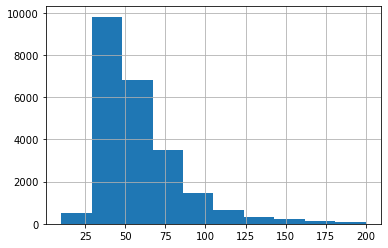

In [17]:
data['total_area'].hist(range=(10, 200)) 
plt.show()

Гистограмма - это график, который показывает, как часто в наборе данных встречается то или иное значение. Проанализируем площадь квартир: наиболее частый вариант - 30-40 кв.м.
Теперь перейдем к цене:

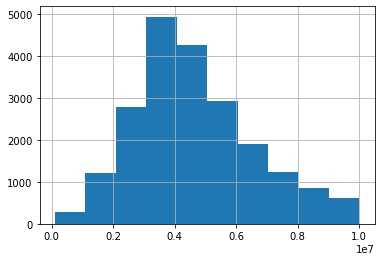

In [18]:
data['last_price'].hist(range=(100000, 10000000)) 
plt.show()

Наиболее частый вариант - 3 млн.руб.

Далее проанализируем число комнат:


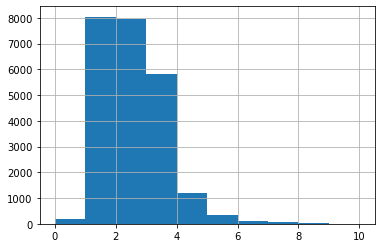

In [19]:
data['rooms'].hist(range=(0, 10)) 
plt.show()

Самый частые варианты - однокомнатные и двухкомнатные квартиры, чуть реже - трехкомнатные.
Далее построим гистограмму по высоте потолков:


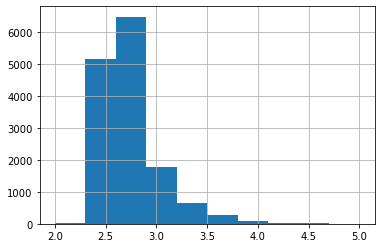

In [20]:
data['ceiling_height'].hist(range=(2, 5)) 
plt.show()

В основном высота потолков в квартирах от 2,5 до 2,8 м.

### 3.2

Изучим время продажи квартиры. Для начала постром гистограмму. 


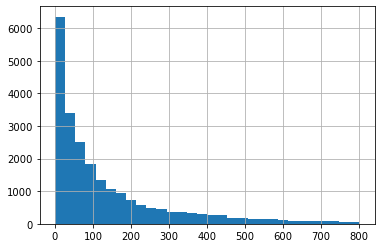

In [21]:
data['days_exposition'].hist(bins=30, range=(0, 800)) 
plt.show()

В среднем, объявления находятся на сайте около 50 дней. Для лучшего анализа посмотрим на среднее значение и медиану с помощью функции `describe`:

In [22]:
data['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

И так, среднее значение равно 156, медиана - 74. Среднее почти в два раз больше медианы. Произошло это потому, что в распределении есть длинный хвост с высокими значениями или несколько очень больший значений (например, макисмальное значение - 1580).
Можно сделать вывод, что продажи квартир занимают обычно около 50 дней. Если меньше - можно сказать, что продажи прошли очень быстро. Если продажи не прошли в течение 180 дней, то можно сказать, что они идут очень долго. 

### 3.3

Уберем редкие и выбивающиеся значения из столбца `days_exposition`. По гистограмме видно, что значения больше 400 очень редки. Также уберем нулевые значения, так как на ноль мы заменяли пропущенные данные.  По этому признаку и отфильтруем данные.


In [23]:
good_data = data.loc[(data['days_exposition'] < 400) & (data['days_exposition'] > 0)] #создаем новый датафрейм, в который фильтруем данные
good_data['days_exposition'].describe() #проверяем результат

count    17873.000000
mean       111.195490
std         97.806621
min          1.000000
25%         38.000000
50%         77.000000
75%        162.000000
max        399.000000
Name: days_exposition, dtype: float64

Заметим, что после фильтрации среднее значение стало равно 111, а медиана - 77. Разница между данными стала намного меньше.

Повторим те же действия для данных столбцов `total_area`, `last_price`, `rooms`, `ceiling_height`:

In [24]:
good_data = data.loc[data['total_area'] < 150] 
good_data = data.loc[data['last_price'] < 10000000]
good_data = data.loc[data['rooms'] < 6]
good_data = data.loc[data['ceiling_height'] < 4]

Проверим размер датасета поселе фильтрации:

In [25]:
good_data['days_exposition'].describe()

count    14390.000000
mean       157.797151
std        219.836676
min          0.000000
25%         17.000000
50%         72.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

Размер уменьшился примерно на 20%.

### 3.4

Изучим, какие факторы больше всего влияют на стоимость квартиры. 

Для начала посмотрим на зависимость цены от площади.


<AxesSubplot:xlabel='total_area'>

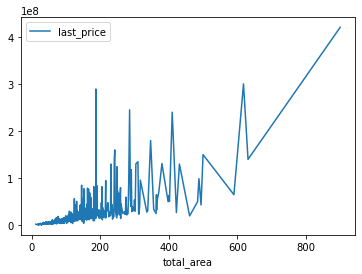

In [26]:
good_data.pivot_table(index='total_area', values='last_price').plot()

Зависимость практически линейная, что логично. Иногда появляются аномалии.
Проверим также корреляцию Пирсона:

In [27]:
good_data['total_area'].corr(good_data['last_price'])

0.7019636439617747

Теперь посмотрим на зависимость цены от числа комнат:

<AxesSubplot:xlabel='rooms'>

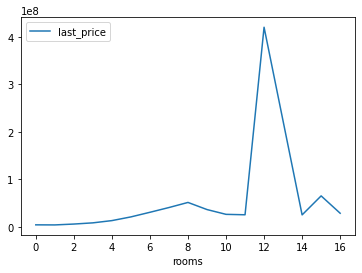

In [28]:
good_data.pivot_table(index='rooms', values='last_price').plot() #график зависимости

In [29]:
good_data['rooms'].corr(good_data['last_price']) #корреляция Пирсона

0.3939862402289828

До 8 комнат стоимость растет, дальше до 11 снижается. Пик цены замечен на 12.
Проанализируем зависимость цены от расстояния до центра:

<AxesSubplot:xlabel='cityCenters_nearest'>

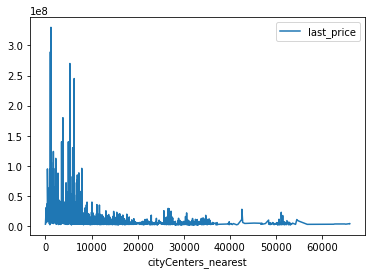

In [30]:
good_data.pivot_table(index='cityCenters_nearest', values='last_price').plot() #график зависимости

In [31]:
good_data['cityCenters_nearest'].corr(good_data['last_price']) #корреляция Пирсона

-0.06928586913301789

Самые высокие цены на квартиры, близкие к центру.
Далее посмотрим на зависимость цены от этажа:

<AxesSubplot:xlabel='floors_category'>

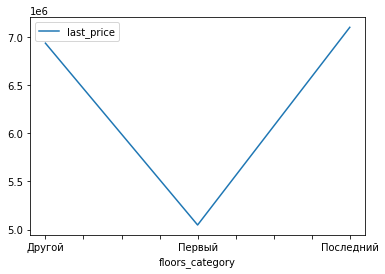

In [32]:
good_data.pivot_table(index='floors_category', values='last_price').plot()

У квартир на первых этажах стоимость самая низкая.
Посмотрим на зависимость цены от дня недели публикации:

<AxesSubplot:xlabel='weekday_exposition'>

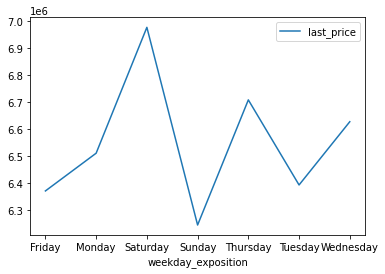

In [33]:
data.pivot_table(index='weekday_exposition', values='last_price').plot()

Квартиры с самой низкой стоимостью чаще публикуются в воскресенье, тогда как с самой высокой - в субботу.
Тоже самое проверим с годом:

<AxesSubplot:xlabel='year_exposition'>

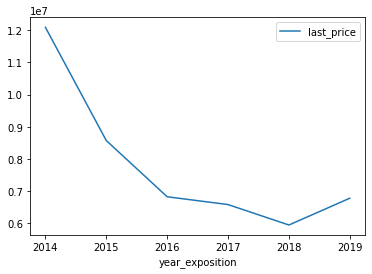

In [34]:
data.pivot_table(index='year_exposition', values='last_price').plot()

In [35]:
good_data['year_exposition'].corr(good_data['last_price']) #корреляция Пирсона

-0.05002528875921357

С 2014 замечен спад на стоимость квартир, а с 2018 - увеличение стоимости. Посмотрим на зависимость от месяца:

<AxesSubplot:xlabel='month_exposition'>

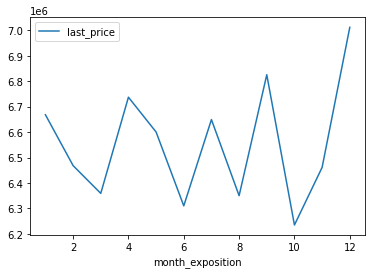

In [36]:
data.pivot_table(index='month_exposition', values='last_price').plot()

In [37]:
good_data['month_exposition'].corr(good_data['last_price']) #корреляция Пирсона

0.003090217218199921

Самые дорогие квартиры публиковались в апреле, июле, сентябре и декабре.

### 3.5


Для начала выберем 10 населенных пунктов с наибольшим числом объявлений:

In [38]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [39]:
group_price=data.query('locality_name in ["Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг"]')
group_price = group_price.pivot_table(index='locality_name', values='last_price', aggfunc='mean')
group_price['last_price'].sort_values().head(15)

locality_name
Выборг             3.250983e+06
Гатчина            3.488337e+06
Всеволожск         3.789068e+06
Колпино            3.964021e+06
деревня Кудрово    4.234158e+06
Пушкин             6.469036e+06
Санкт-Петербург    8.062507e+06
Name: last_price, dtype: float64


Самая высокая стоимость жилья - в Санкт-Петербурге.
Самая низкая - в Выборге.

### 3.6

Выясним, какая область входит в центр.

Построим график: он должен показывать, как цена зависит от удалённости от центра. 
Определим границу, где график сильно меняется, — это и будет центральная зона - 5 км.

<AxesSubplot:xlabel='cityCenters_nearest'>

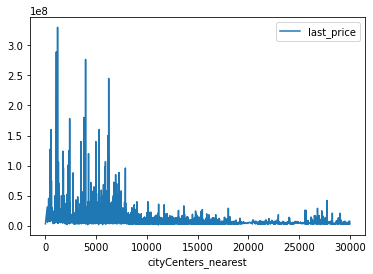

In [40]:

data_g = data.groupby(['cityCenters_nearest']).agg({'last_price':'mean'}).reset_index()
data_g[data_g['cityCenters_nearest'] <= 30000].plot(x = 'cityCenters_nearest', y = 'last_price') 

### Шаг 3.7

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

In [41]:
data_centres = data.loc[data['cityCenters_nearest'] < 5000] #отбираем квартиры в центре
data_centres['total_area'].value_counts() #сортируем значения по площади

36.00     123
44.00     109
42.00     108
60.00     106
35.00     106
         ... 
38.02       1
49.40       1
110.72      1
187.00      1
133.81      1
Name: total_area, Length: 1433, dtype: int64

Чаще всего в центре встречаются квартиры 36 кв.м.

In [42]:
data_centres['last_price'].value_counts() #анализируем цены

2500000.0     104
3100000.0      98
2400000.0      94
3500000.0      88
3300000.0      86
             ... 
2205000.0       1
585000.0        1
11207364.0      1
4110000.0       1
9470000.0       1
Name: last_price, Length: 1438, dtype: int64

Чаще всего в центре стоимость 2 500 000 руб.

In [43]:
data_centres['rooms'].value_counts() #анализируем количество комнат

2     2595
1     2391
3     1753
4      472
5      188
0       86
6       60
7       39
8        7
11       2
10       2
15       1
19       1
9        1
16       1
14       1
Name: rooms, dtype: int64

Чаще всего в центре встречаются двухкомнатные квартиры.

In [44]:
data_centres['ceiling_height'].value_counts()

2.50    1007
2.60     455
2.70     450
3.00     393
2.75     276
        ... 
3.03       1
2.20       1
3.57       1
1.20       1
2.91       1
Name: ceiling_height, Length: 148, dtype: int64

Чаще всего высота потолков квартир в центре - 2,5 м.

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления):

<AxesSubplot:xlabel='rooms'>

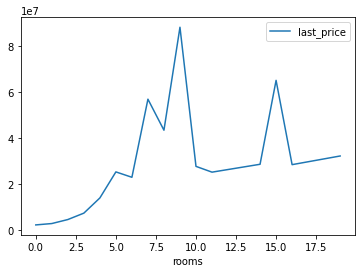

In [45]:
data_centres.pivot_table(index='rooms', values='last_price').plot() #строим зависимость количества комнат от цены

<AxesSubplot:xlabel='cityCenters_nearest'>

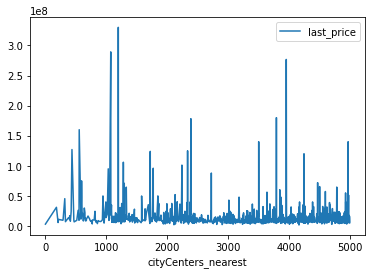

In [46]:
data_centres.pivot_table(index='cityCenters_nearest', values='last_price').plot() #зависимость этажа от цены

<AxesSubplot:xlabel='floors_category'>

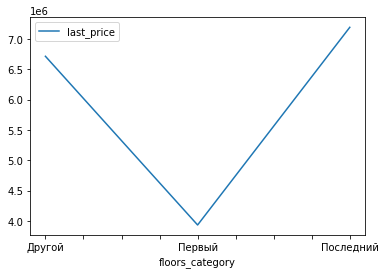

In [47]:
data_centres.pivot_table(index='floors_category', values='last_price').plot() #зависимость расстояния от центра от цены

<AxesSubplot:xlabel='year_exposition'>

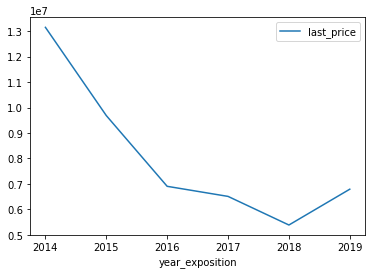

In [48]:
data_centres.pivot_table(index='year_exposition', values='last_price').plot() #зависимость года публикации от цены

Теперь сравним с общими выводами. 
* Число комнат. Рост заметен только до 5 комнат. Пик на 9.
* Год. Также замечен подъем цен с 2018 года.
* Расстояние от центра. Сделать выводы сложнее, так как в данном случае зависимости явной нет.
* Этажи. Результат такой же, как и в общих выводах.

## Общий вывод

В данной работе было проведено исследование объявлений о продаже квартир. Сначала данные были обработаны: исключены пропущенные значения, строки-дубликаты и исправлены типы данных.
После введения дополнительных столбцов, для упрощения будущего анализа, мы приступили к анализу данных.

Анализ состоял из следующих этапов:
* изучение следующих параметров: площадь, цена, число комнат, высота потолков; 
* изучение времени продажи квартиры; 
* удаление редких и выбивающихся значений; 
* обнаружение факторов, которые больше всего влияют на стоимость квартиры;
* выделение населённых пунктов с самой высокой и низкой стоимостью жилья;
* зависимость цены от удалённости от центра;
* изучение площади, цены, числа комнат и высоты потолков квартир в центре.

В каждом шаге подведены поэтапные выводы.


Параметры, сформированные на аномалиях, которые могут указывать на мошенническую деятельность: общая площадь больше 150 кв.м., количество комнат больше 9 и высота потолка большее 4 м.
